# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [193]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns

## load the data sets

In [194]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [195]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [196]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

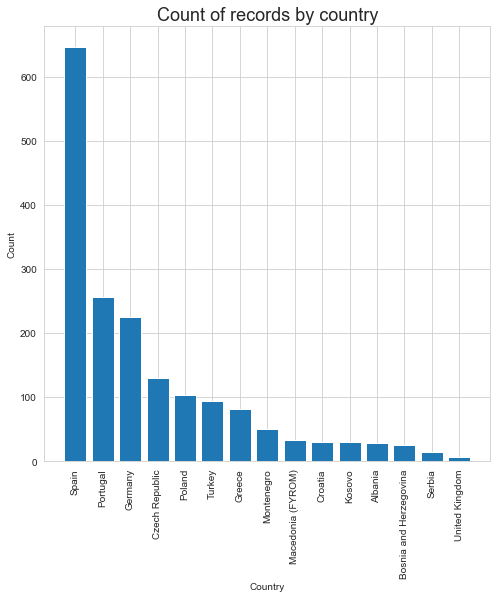

In [220]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim


df_country = df.groupby(df['country'])[['lat']].count().sort_values(by='lat', ascending=False)
df_country.rename(columns={"lat":"count"},inplace = True)
df_country.reset_index(inplace=True)

plt.figure(1, figsize=(8,8), )
ax = plt.bar(df_country['country'],df_country['count'])
#df_country.plot(kind='bar')
plt.title('Count of records by country',fontsize=18)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

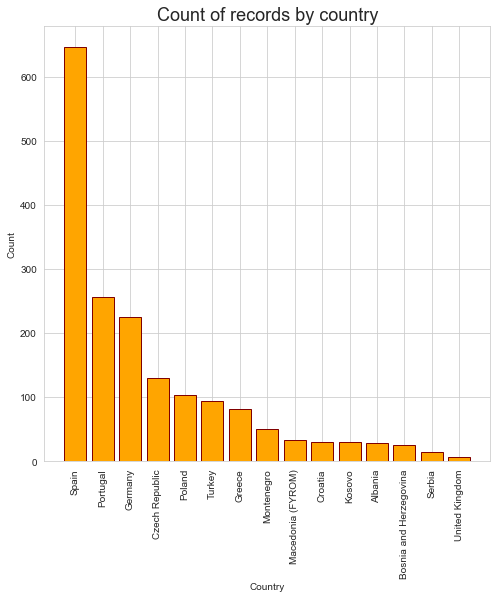

In [221]:
plt.figure(1, figsize=(8,8), )
ax1 = plt.bar(df_country['country'],df_country['count'],color = 'orange',edgecolor = 'maroon')
#df_country.plot(kind='bar')
plt.title('Count of records by country',fontsize=18)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

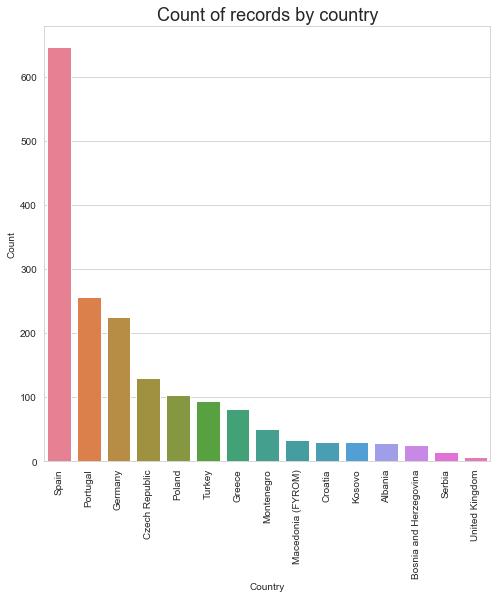

In [222]:
sns.set_style("whitegrid")
df_country.shape
plt.figure(1, figsize=(8,8), )
ax2 = sns.barplot(x="country", y="count", data=df_country,palette=sns.color_palette("husl",15 ))
ax2.set_title("Count of records by country",fontsize=18)
ax2.set_ylabel('Count')
ax2.set_xlabel('Country')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

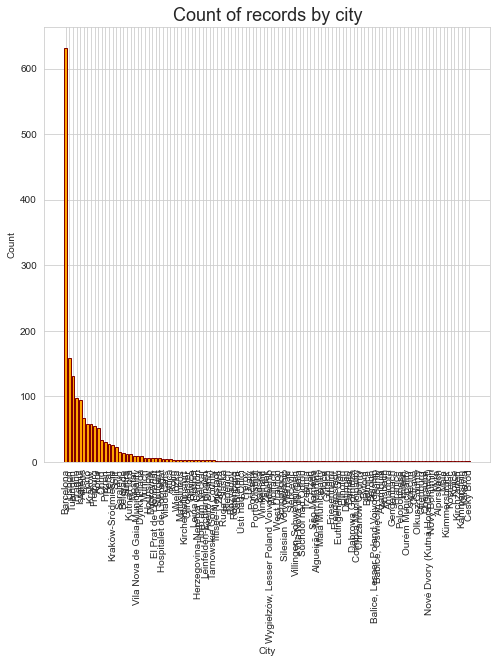

In [224]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
df_city = df.groupby(df['city'])[['lat']].count().sort_values(by='lat', ascending=False)
df_city.rename(columns={"lat":"count"},inplace = True)
df_city.reset_index(inplace = True)

plt.figure(1, figsize=(8,8), )
ax3 = plt.bar(df_city['city'],df_city['count'],color='orange',edgecolor = 'maroon')
plt.title('Count of records by city',fontsize=18)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

    The distribution of visits seems to be very skewed, with most cities having relatively small visits. To zoom in to those and get a better sense of the distribution we might slice the blocks to isolate those below the long tail of the distribution. 

In [201]:
print(df_city['count'].quantile(.90))
large_visit = df_city[df_city['count'] > df_city['count'].quantile(.90)]
print(df_city.shape)
print(large_visit.shape)

29.39999999999999
(113, 2)
(12, 2)


    We can see that 10% of the cities have more than 29 visiters. Let's plot the distribution again after truncating the top ten percent.

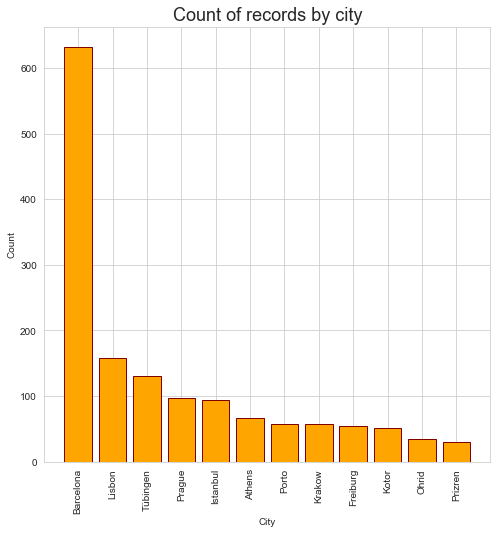

In [225]:
plt.figure(1, figsize=(8,8), )
ax4 = plt.bar(large_visit['city'],large_visit['count'],color='orange',edgecolor = 'maroon')
plt.title('Count of records by city',fontsize=18)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'City')

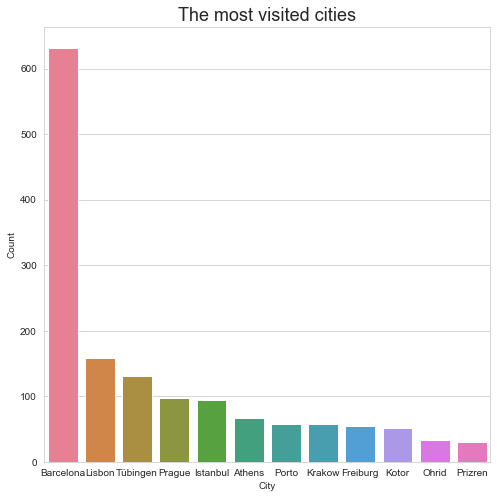

In [214]:
sns.set_style("whitegrid")
plt.figure(1, figsize=(8,8), )
ax5 = sns.barplot(x="city", y="count", data=large_visit,palette=sns.color_palette("husl",12 ))
ax5.set_title("The most visited cities",fontsize=18)
ax5.set_ylabel('Count')
ax5.set_xlabel('City')

## Next: scatter plots as simple maps

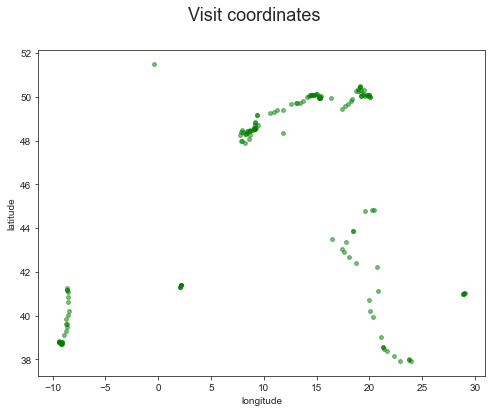

In [207]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 
plt.figure(1, figsize=(8,6))
plt.suptitle('Visit coordinates', fontsize=18)
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.xlim(0,5000)
#plt.ylim(0,10000)
# s: marker size
ax6 = plt.scatter(rs['lon'], rs['lat'], color='g', alpha=0.5, edgecolor='g',s = 15)
plt.show()

Text(0.5, 0, 'longitude')

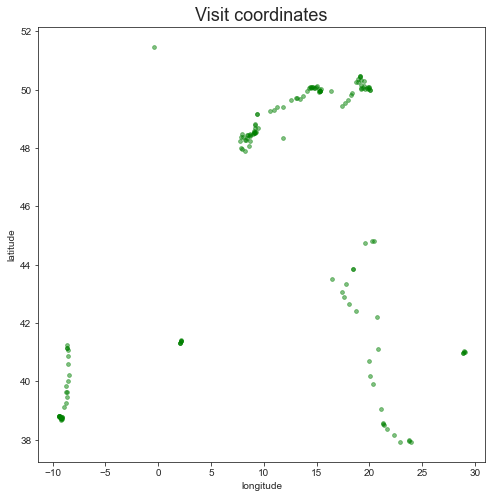

In [215]:
sns.set_style("ticks")
plt.figure(1, figsize=(8,8), )
ax7 = sns.scatterplot(rs['lon'], rs['lat'], color='g', alpha=0.5, edgecolor='g',s = 15)
ax7.set_title('Visit coordinates', fontsize=18)
ax7.set_ylabel('latitude')
ax7.set_xlabel('longitude')

## Line charts, with annotation

In [18]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

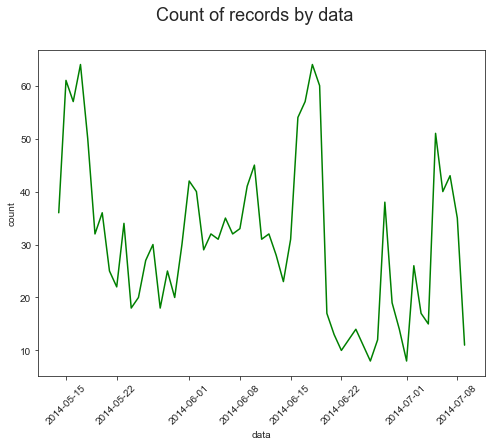

In [216]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
plt.figure(1, figsize=(8,6))
plt.suptitle('Count of records by data', fontsize=18)
plt.xlabel('data')
plt.ylabel('count')
plt.xticks(rotation=45)
#plt.xlim(0,5000)
#plt.ylim(0,10000)
# s: marker size
ax8 = plt.plot(countdata, color='g')
plt.show()


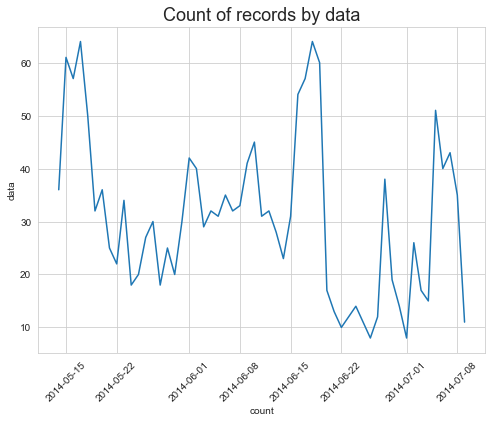

In [217]:
sns.set_style("whitegrid")
plt.figure(1, figsize=(8,6), )
#sns.lineplot(data=data, palette="tab10", linewidth=2.5)
ax9 = sns.lineplot(data=countdata)
ax9.set_title('Count of records by data', fontsize=18)
ax9.set_ylabel('data')
ax9.set_xlabel('count')
for item in ax9.get_xticklabels():
    item.set_rotation(45)


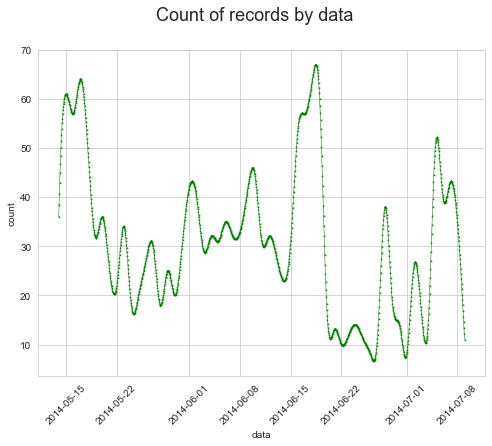

In [218]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

startDate = countdata.index[0]
endDate = countdata.index[len(countdata)-1]
index_hourly = pd.date_range(startDate, endDate, freq='1H')
df_smooth = countdata.reindex(index=index_hourly).interpolate('cubic')


plt.figure(1, figsize=(8,6))
plt.suptitle('Count of records by data', fontsize=18)
plt.xlabel('data')
plt.ylabel('count')
plt.xticks(rotation=45)
ax9 = plt.plot(df_smooth,marker="v", markersize=1,color='g',linewidth = 0.5)
plt.show()



## Pie charts

In [186]:
cities = df['city'].value_counts()
print(cities.count())


cities = cities.sort_values(ascending=False)
cities_top = cities[cities > cities.quantile(.90)]
other_count = cities[cities <= cities.quantile(.90)].sum()
s = pd.Series(other_count, index=['other'])
cities_top = cities_top.append(s)

113


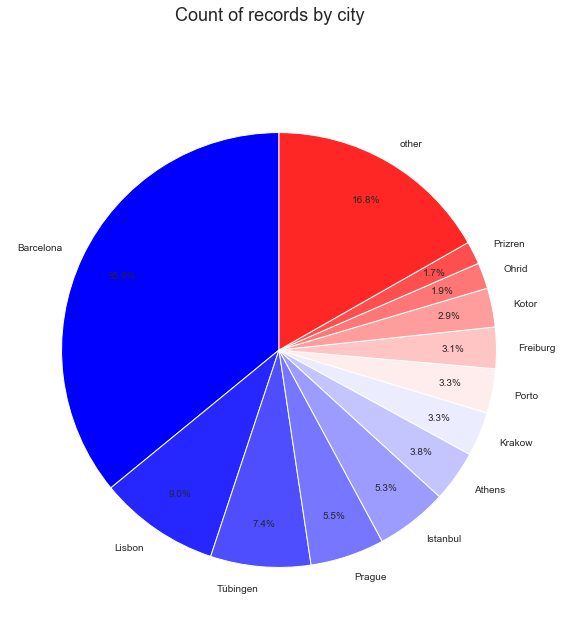

In [226]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = cities_top.index
fig, ax10 = plt.subplots(figsize=(10, 10))
theme = plt.get_cmap('bwr')
ax10.set_prop_cycle("color", [theme(1. * i / len(cities_top))
                             for i in range(len(cities_top))])
ax10.pie(cities_top,labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=0.8)
plt.suptitle('Count of records by city', fontsize=18)
plt.show()
